In this tutorial we will implement a feature extractor and use it to match between two images.

There're many feature extractors, the most famous of them SIFT, SURF, KAZE, AKAZE and ORB. <br>
in this tutorial we'll use AKAZE as an open source feature extractor with high accuracy as it concerns about the feature and the feature orientation. <br>

# Code

In [41]:
#Imports
import numpy as np
import cv2 
from matplotlib import pyplot as plt

In [42]:
#Load Original Image and template image which you want to find in the original one
#both in gray scale so we pass flag = 0 in imread method to convert RGB->Gray
originalImage = cv2.imread("./img/original.jpg")
tempelateImage = cv2.imread("./img/temp.jpg")

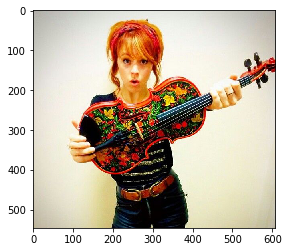

In [43]:
#Original
plt.imshow(cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB))

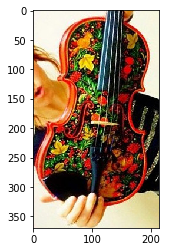

In [44]:
#Template
plt.imshow(cv2.cvtColor(tempelateImage, cv2.COLOR_BGR2RGB))

In [45]:
#Convert both images into gray scale
originalImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
originalImage_H, originalImage_W  = originalImage.shape

tempelateImage = cv2.cvtColor(tempelateImage, cv2.COLOR_BGR2GRAY)
tempelateImage_H, tempelateImage_W  = tempelateImage.shape 

In [46]:
###Create AKAZE 
akaze = cv2.AKAZE_create()
originalImage_kp, originalImage_des = akaze.detectAndCompute (originalImage,None)
tempelateImage_kp, tempelateImage_des = akaze.detectAndCompute(tempelateImage, None)

In [47]:
###Find Matches using KNN matcher which find the nearest almost points to each other that match in the two images.
matcher = cv2.BFMatcher()
knnMatches = matcher.knnMatch(tempelateImage_des,originalImage_des, k=2)

In [48]:
#List all features points which matches
good = []
for m,n in knnMatches: 
    if m.distance < 0.9*n.distance:
        good.append(m)

In [49]:
src_pts = np.float32([ tempelateImage_kp[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
dst_pts = np.float32([ originalImage_kp[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
matchesMask = mask.ravel().tolist()

pts = np.float32([ [0,0],[0,tempelateImage_H-1],[tempelateImage_W-1,tempelateImage_H-1],[tempelateImage_W-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)

In [50]:
#Draw Matches and draw bounding rectangle to the matched area
originalImage = cv2.polylines(originalImage,[np.int32(dst)],True,(0,0,255),2, cv2.LINE_AA) 

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
               singlePointColor = (255,0,0),
               matchesMask = matchesMask, # draw only inliers
               flags = 2)
img3 = cv2.drawMatches(tempelateImage,tempelateImage_kp, originalImage,originalImage_kp, good, None,**draw_params)

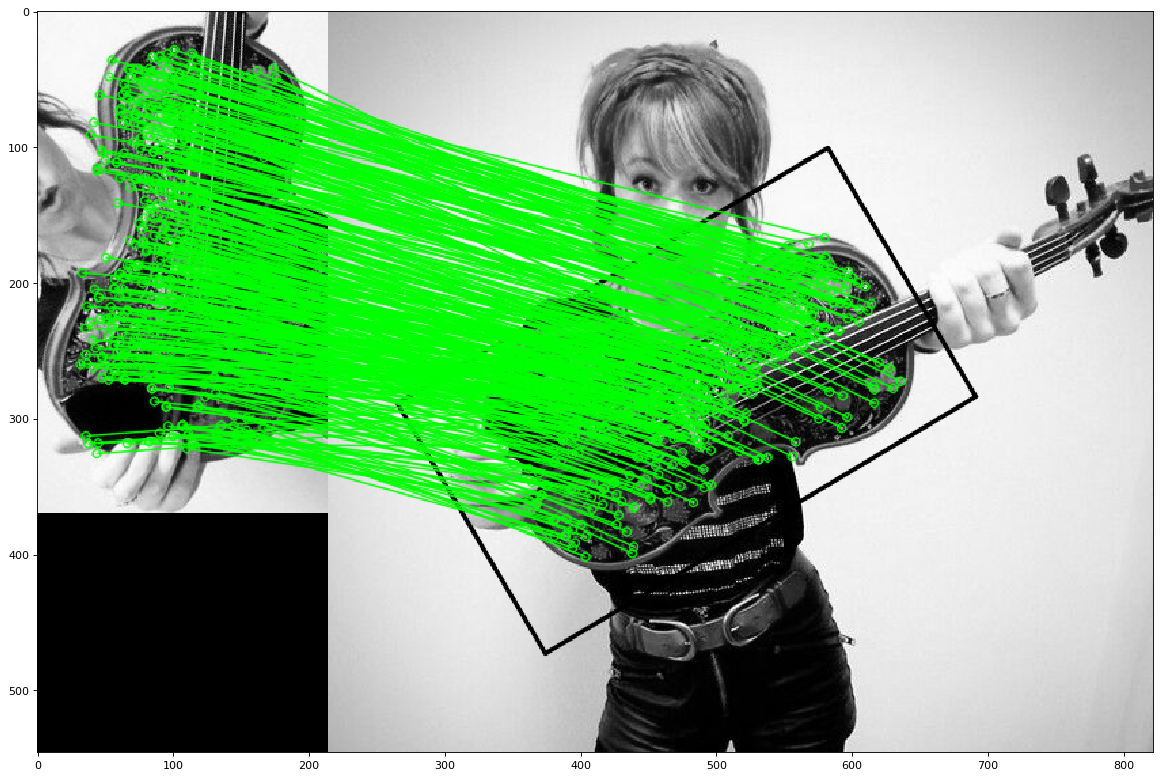

In [51]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')


plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))